In [3]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbe962048b0>)

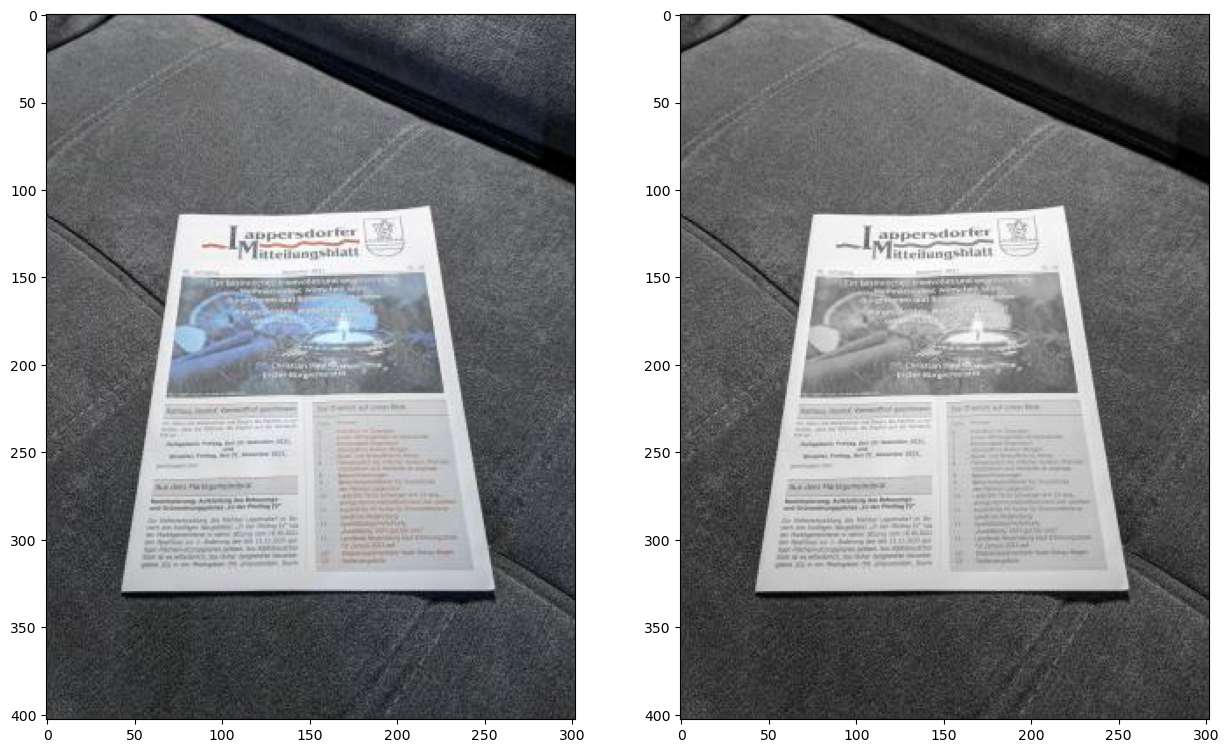

In [4]:
img = cv2.imread('document.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')



In [5]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

(403, 302, 3)


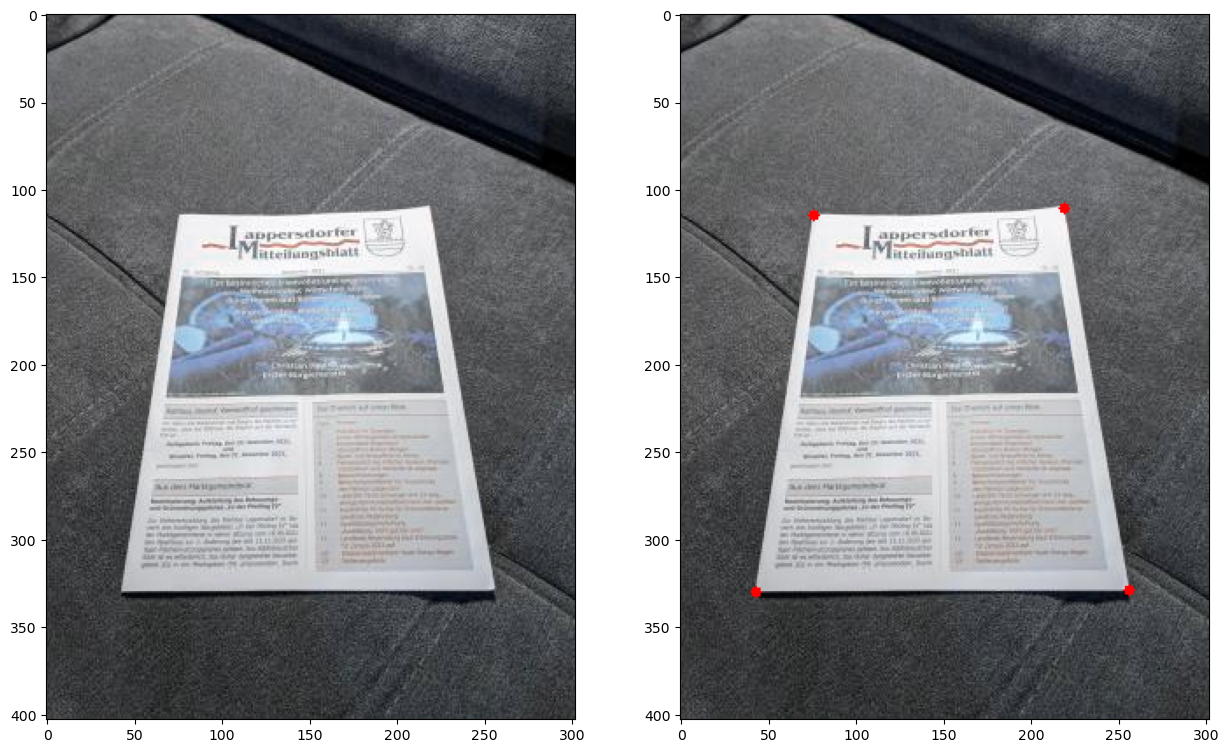

In [6]:


# Let's plot the points
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)
print(img.shape)



In [7]:
# Define the matrix of source points corresponding to the 4 document corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
src = np.array([top_left, bottom_left, top_right, bottom_right], dtype=np.float32)
print(src)

[[ 76. 115.]
 [ 43. 330.]
 [219. 111.]
 [256. 329.]]


In [8]:
# Define the matrix of target (destination) points corresponding to the 4 image corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
# Note2: The order of points in src and dst must be the same
dst = np.array([[0,0], [0,302],[403,0], [403,302]], dtype=np.float32)
print(dst)

[[  0.   0.]
 [  0. 302.]
 [403.   0.]
 [403. 302.]]


In [10]:

# Define the 3 pairs of corresponding points 
input_pts = np.float32(src[:3])
output_pts = np.float32(dst[:3])


# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts, output_pts)

# Apply the affine transformation using cv2.warpAffine()

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbe946770d0>)

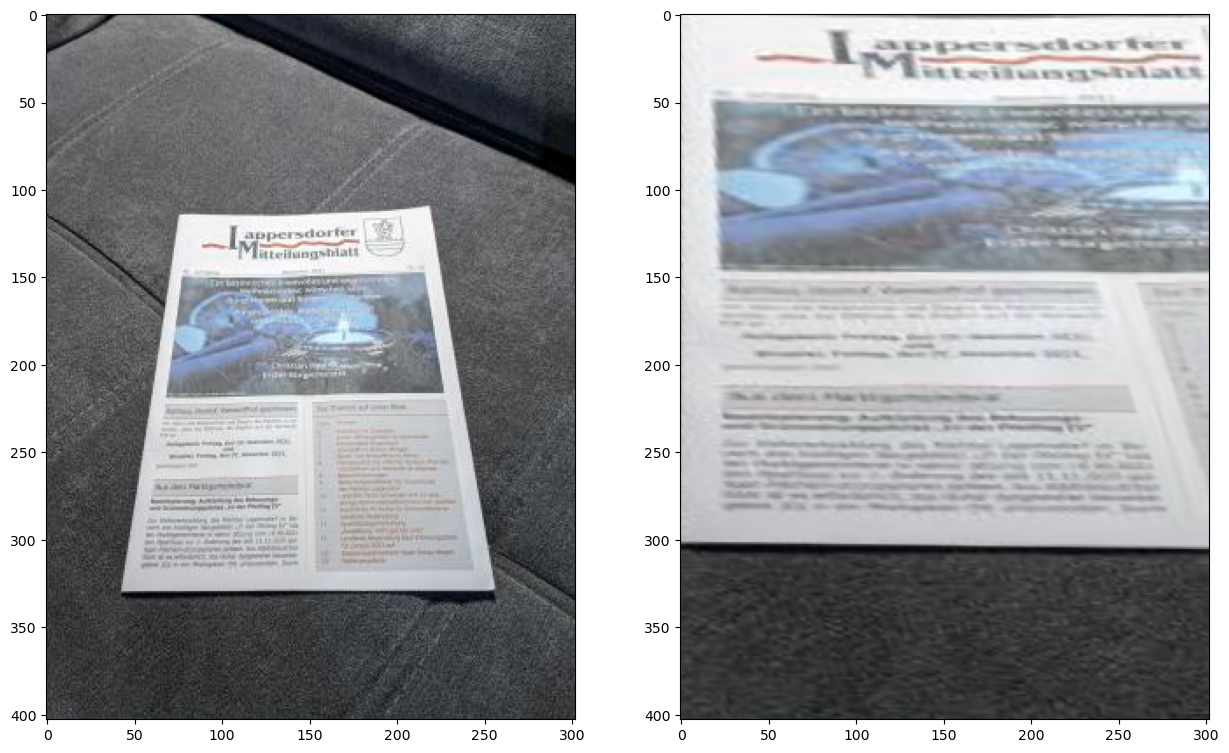

In [11]:

# Build the rectified image using the computed matrix (you'll have to use warpAffine function from OpenCV here)
rectified = cv2.warpAffine(img, M, (cols,rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)



(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbe94677bb0>)

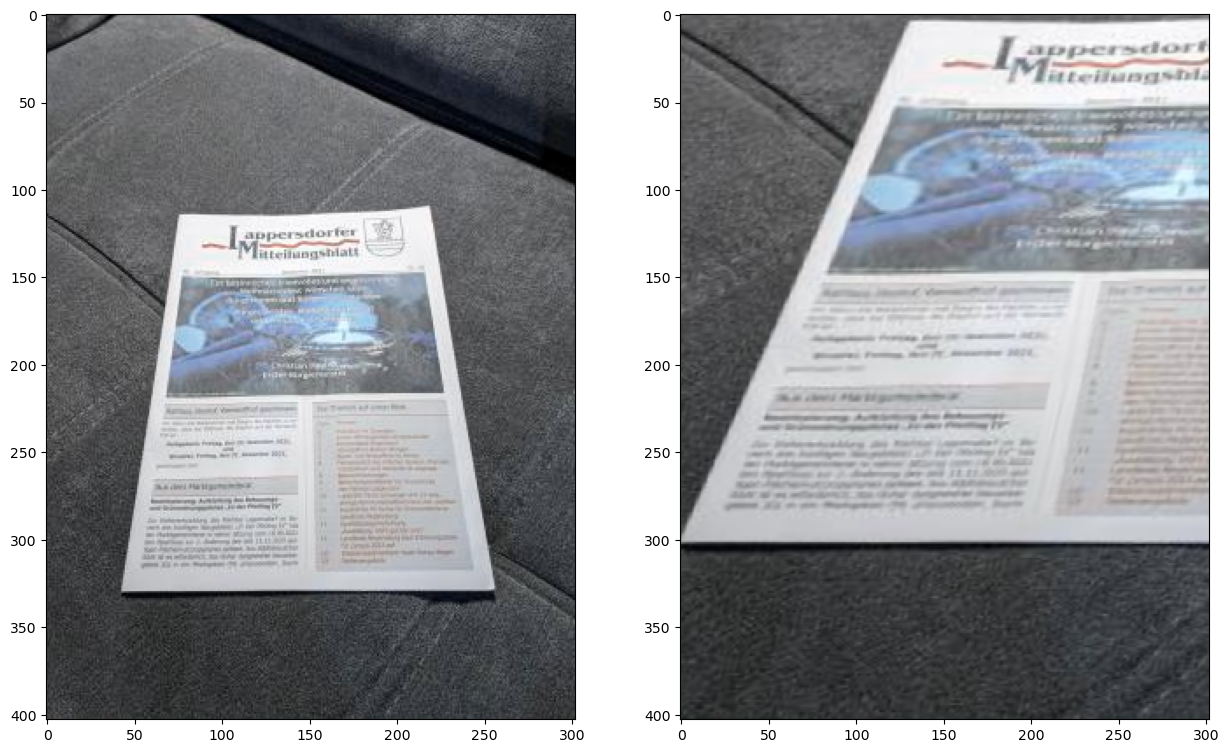

In [12]:

# Compute the affine transform matrix (use getAffineTransform)
# Use the last 3 points from your src and dst matrix

input_pts = np.float32(src[-3:])
output_pts = np.float32(dst[-3:])


# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts, output_pts)



# Build the rectified image using the computed matrix (use warpAffine)
rectified =cv2.warpAffine(img, M, (cols,rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)



[[ 1.89051236e+00 -3.20866777e-01  2.45940049e+01]
 [ 6.49867659e-03  1.38421811e+00 -1.55071421e+02]] [[1]
 [1]
 [1]]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbe50ab5fd0>)

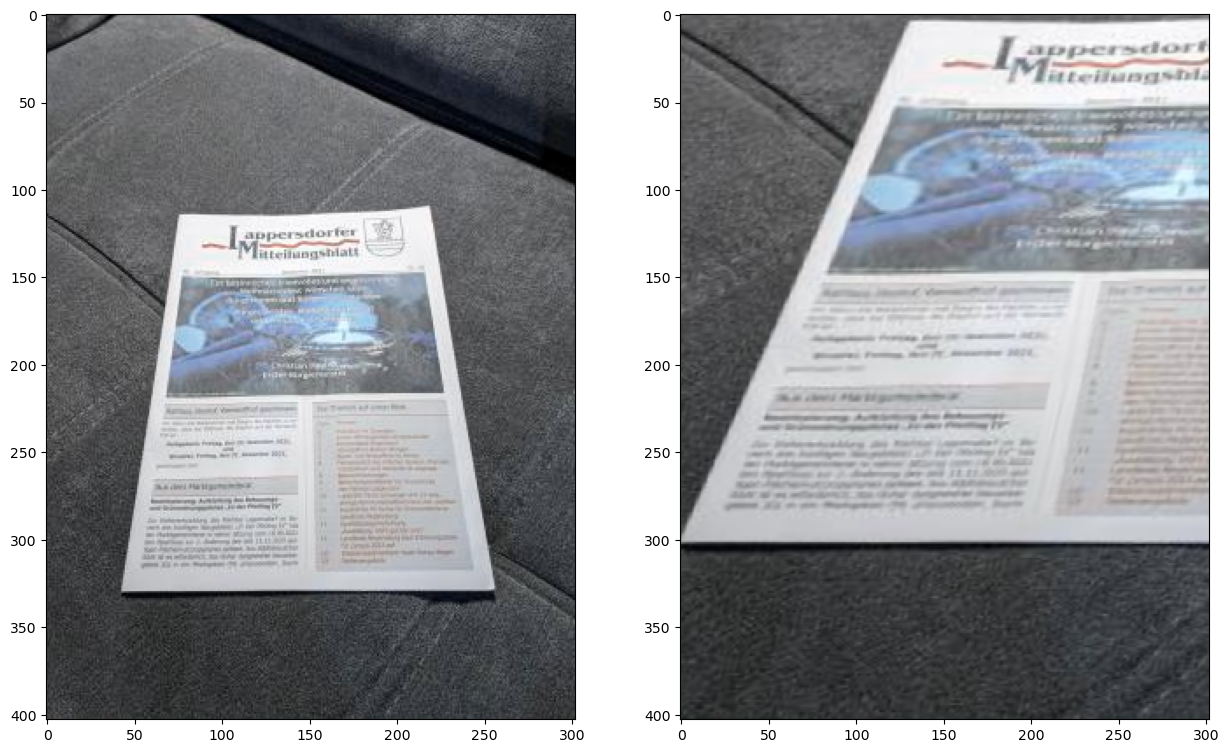

In [13]:
# Estimate the optimal affine transform matrix (you'll have to use estimateAffine2D function from OpenCV here)
# estimateAffine2D it returns the best fitting affine matrix as well as the vector of inliers (1 -> inlier,
# 0 -> outlier).
M, inliers = cv2.estimateAffine2D(input_pts, output_pts)

print(M, inliers)

# Build the rectified image using the computed matrix (use warpAffine)
rectified = cv2.warpAffine(img, M, (cols,rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

[[ 3.96333802e+00  6.08326301e-01 -3.71171214e+02]
 [ 8.07309482e-02  2.88613140e+00 -3.38040663e+02]
 [ 2.37188082e-04  3.13841065e-03  1.00000000e+00]]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbe506618e0>)

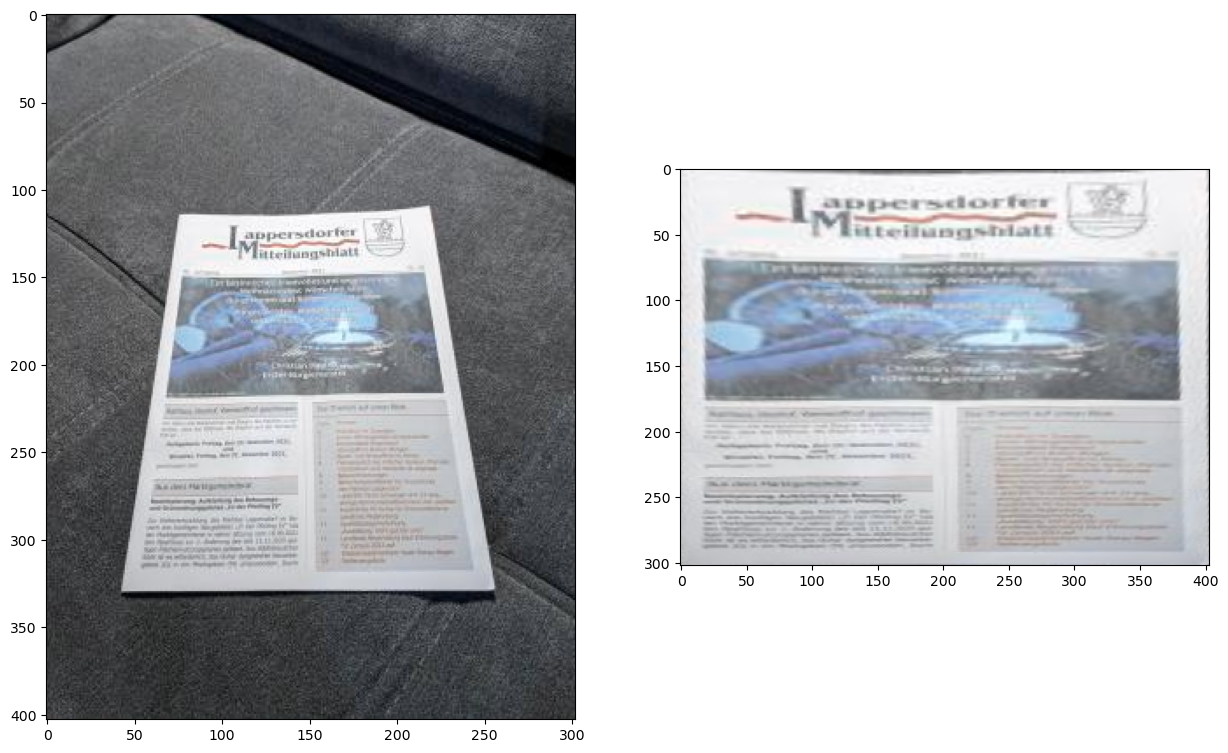

In [16]:
input_pts = np.float32(src[:])
output_pts = np.float32(dst[:])

# Compute the homography matrix (you'll have to use getPerspectiveTransform function from OpenCV here)
M = cv2.getPerspectiveTransform(input_pts, output_pts)
print(M)



# Generate the stitched image
rectified = cv2.warpPerspective(img, M, (403, 302))


# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)





(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbe506ba2e0>)

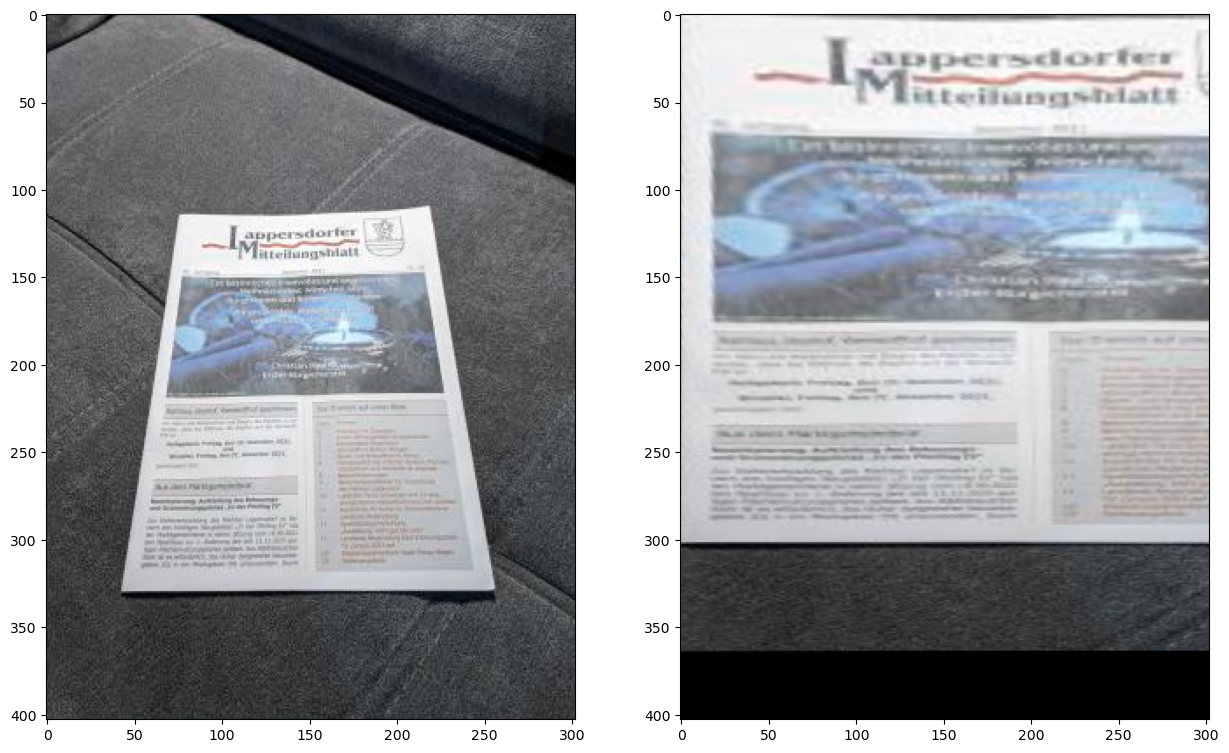

In [17]:
rectified = cv2.warpPerspective(img, M, (302, 403))


# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbe52be18b0>)

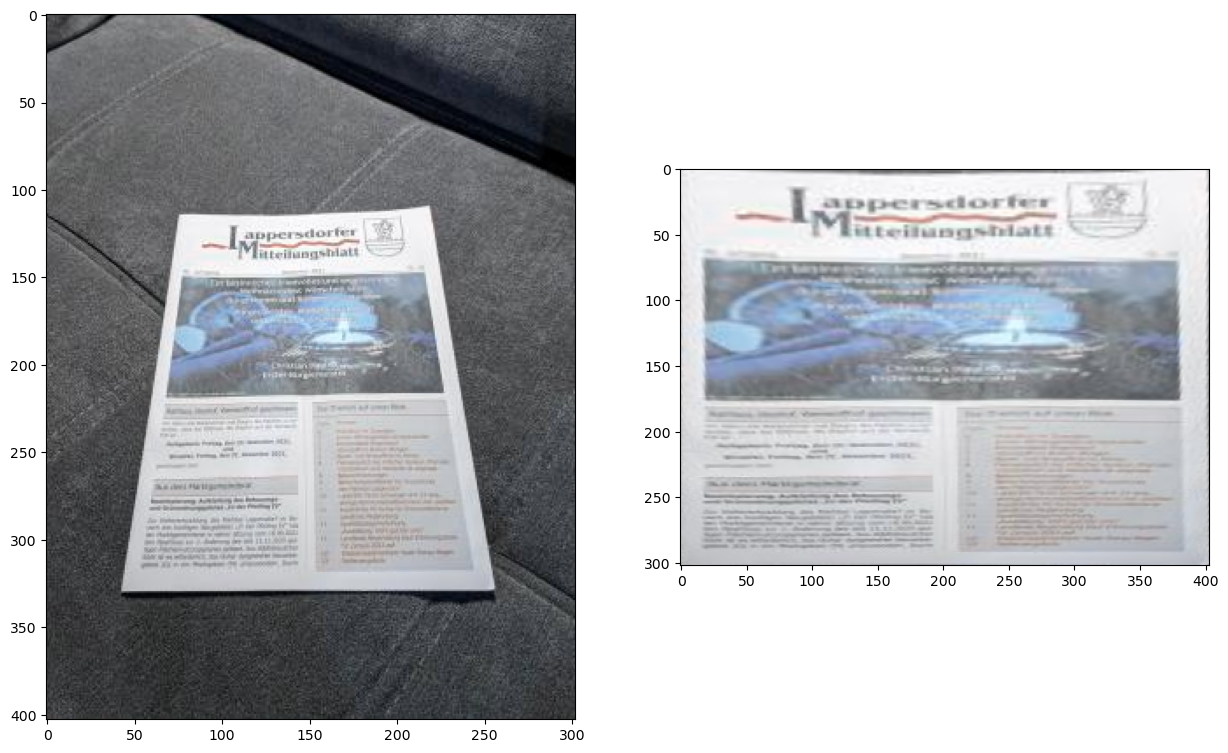

In [15]:
# I tried to apply another function to do the same.
(H, status) = cv2.findHomography(input_pts, output_pts, cv2.RANSAC, 4)
rectified = cv2.warpPerspective(img, H, (403, 302))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)


Answers
1. The affine transform does not seem to be working well in this case. Why?
I think it is related to the factor that affine transformation enables to preserve the paralellism, but in the original image we have distorted perspecitive and no parallel lines.

2. What can you tell me about the values you have obtained for the inliers vector? What does it mean?

I obtained ones in the inliers vector, so the programm decided that model works well, and no wrong keypoints matches on two images were detected, but I am not sure I did everything correctly.

3. How does the result from homography look? Does it work well enough?
It looks ok only if I swap the width and length of the image, but if to preserve the original size of the image the bottom side of the image looks unfilled with the paper 


